# PRE- ENTREGA 3 


### **INTEGRANTES (GRUPO 3)**



*   Casanova, Beverly
*   Nuñez, Lourdes

*   Perez, Micaela
*   Cardozo, Pamela


## FRAUDES FINANCIEROS

En el presente trabajo se hace un análisis sobre un tema de gran relevancia en el mundo financiero: el fraude con tarjetas de crédito. Este fenómeno, que
afecta tanto a consumidores como a instituciones financieras, ha cobrado
importancia debido al aumento de las transacciones electrónicas y al uso generalizado de tarjetas de crédito.

Nuestro análisis se basa en un conjunto de datos detallado que recoge diversas transacciones con tarjetas de crédito, clasificadas según si son fraudulentas o no. Este dataset proporciona una oportunidad única para explorar los patrones y características que distinguen a las transacciones legítimas de las fraudulentas.

Este proyecto no solo busca identificar transacciones fraudulentas de manera eficiente, sino también proporcionar herramientas y conocimientos que pueden ser aplicados en contextos similares de detección de fraudes.



## Origen del Dataset

Debido a que la mayoría de los Dataset de Argentina son incompletos,con pocos datos y en su mayoría privados, elegimos un Dataset Internacional, y simularemos que es un banco de Argentina.
Proporcionamos el link de nuestro Dataset: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

# Cargamos las librerías a utilizar

In [0]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Visualización
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, recall_score, roc_curve
from sklearn.pipeline import Pipeline
import scikitplot as skplt
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from tabulate import tabulate
from sklearn.metrics import classification_report, precision_score, f1_score
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Algoritmos de Árboles de Decisión y Random Forest
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Configuración de visualización
# ==============================================================================
%matplotlib inline
sns.color_palette("pastel")
sns.set_palette("pastel")
#sns.set_style("whitegrid")


# Importar las librerías necesarias
from tabulate import tabulate


# ---------- Otras Librerias -------
# from dataprep.eda import create_report, plot, plot_correlation, plot_missing, plot_diff

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
#from google.colab import drive #importamos
#drive.mount('/content/drive')

**REALIZAMOS LA LECTURA DE NUESTRA BASE DE DATOS**

In [ ]:
# Leemos el archivo csv
#df_fraude = pd.read_csv('/content/drive/My Drive/Curso Ingenias/fraud_test.csv', delimiter=',',index_col=0)
df_fraude = pd.read_csv('fraud_test.csv', sep=",")

In [ ]:
#Visualizamos el dataframe
df_fraude.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Obtenemos información general del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(df_fraude.info())


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float

In [ ]:
# Para facilitar nuestro dataset, se renombran las columnnas de ingles a español.
# Diccionario de mapeo de nombres en inglés a español
columnas_renombradas = {
    'trans_date_trans_time': 'fecha_transaccion',
    'cc_num': 'num_tarjeta',
    'merchant': 'comerciante',
    'category': 'categoria',
    'amt': 'monto',
    'first': 'nombre',
    'last': 'apellido',
    'gender': 'genero',
    'street': 'calle',
    'city': 'ciudad',
    'state': 'estado',
    'zip': 'codigo_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'poblacion_ciudad',
    'job': 'trabajo',
    'dob': 'fecha_nacimiento',
    'trans_num': 'num_transaccion',
    'unix_time': 'tiempo_unix',
    'merch_lat': 'latitud_comerciante',
    'merch_long': 'longitud_comerciante',
    'is_fraud': 'es_fraude'
}

# Renombramos las columnas
df_fraude.rename(columns=columnas_renombradas, inplace=True)

# Mostramos los nuevos nombres de las columnas
print("Columnas renombradas:", df_fraude.columns)

Columnas renombradas: Index(['Unnamed: 0', 'fecha_transaccion', 'num_tarjeta', 'comerciante',
       'categoria', 'monto', 'nombre', 'apellido', 'genero', 'calle', 'ciudad',
       'estado', 'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad',
       'trabajo', 'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude'],
      dtype='object')


In [ ]:
# Convertir la columna 'fecha_nacimiento' a tipo datetime
df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])

# calcular la edad
df_fraude['edad'] = (2020  - df_fraude['fecha_nacimiento'].dt.year)

### Modelos de Aprendizaje

In [ ]:
# Verificar las columnas disponibles en df_fraude
print("Columnas en df_fraude:", df_fraude.columns)

# Intentar eliminar columnas especificadas
#df_fraude.drop(columns=['calle', 'nombre', 'apellido', 'fraud'], inplace=True, errors='ignore')
df_train = df_fraude.copy()

# Codificación de etiquetas
le = LabelEncoder()
for columna in df_train.columns:
    if df_train[columna].dtype == 'object':
        df_train[columna] = le.fit_transform(df_train[columna])


Columnas en df_fraude: Index(['Unnamed: 0', 'fecha_transaccion', 'num_tarjeta', 'comerciante',
       'categoria', 'monto', 'nombre', 'apellido', 'genero', 'calle', 'ciudad',
       'estado', 'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad',
       'trabajo', 'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude', 'edad'],
      dtype='object')


In [ ]:
# Verificar las columnas disponibles en df_fraude
print("Columnas en df_fraude:", df_fraude.columns)

# Intentar eliminar columnas especificadas
#df_fraude.drop(columns=['calle', 'nombre', 'apellido', 'fraud'], inplace=True, errors='ignore')
df_train = df_fraude.copy()

# Codificación de etiquetas
le = LabelEncoder()
for columna in df_train.columns:
    if df_train[columna].dtype == 'object':
        df_train[columna] = le.fit_transform(df_train[columna])


Columnas en df_fraude: Index(['Unnamed: 0', 'fecha_transaccion', 'num_tarjeta', 'comerciante',
       'categoria', 'monto', 'nombre', 'apellido', 'genero', 'calle', 'ciudad',
       'estado', 'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad',
       'trabajo', 'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude', 'edad'],
      dtype='object')


In [ ]:
# Seleccionar características (X) y la etiqueta (y)
# Definir las columnas que se usarán como características y la etiqueta objetivo
caracteristicas_modelo = ["genero", "trabajo", "categoria", "comerciante", "estado", "edad"]
objetivo = ["es_fraude"]

X = df_train[caracteristicas_modelo] # Caracteristicas
y = df_train[objetivo] # Etiqueta objetivo

# Construir el modelo
# Dividir el dataset en conjuntos de entrenamiento y prueba
# Divide el conjunto de datos en entrenamiento (80%) y prueba (20%).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Balancear el conjunto de datos utilizando SMOTE
# Aumentar el número de ejemplos de la clase minoritaria para manejar el desbalance de clases
smote = SMOTE(sampling_strategy='auto')
X_train_resampleado, y_train_resampleado = smote.fit_resample(X_train, y_train)
X_train = X_train_resampleado
y_train = y_train_resampleado

# Estandarización
# Escalar las características para que tengan media 0 y desviación estándar 1
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)  # Asegúrate de estandarizar también X_test

# Entrenamiento e impresión de los resultados

Para cada uno de los modelos se realiza un bucle que recolecta la información.

In [ ]:
# Inicializar los modelos
# Crear instancias de los modelos de regresión logística, árbol de decisión, XGBoost y LightGBM
modelo_logistico = LogisticRegression()
arbol_decision = DecisionTreeClassifier()
modelo_xgboost = xgb.XGBClassifier()
modelo_lightgbm = lgb.LGBMClassifier()

In [ ]:
# Entrenar los modelos
# Ajustar los modelos a los datos de entrenamiento balanceados
modelo_logistico.fit(X_train, y_train)
arbol_decision.fit(X_train, y_train)
modelo_xgboost.fit(X_train, y_train)
modelo_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 387498, number of negative: 387498
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 774996, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [ ]:
# Predicciones
# Predecir las etiquetas para los datos de prueba usando los modelos entrenados
y_pred_logistico = modelo_logistico.predict(X_test)
y_pred_arbol = arbol_decision.predict(X_test)
y_pred_xgboost = modelo_xgboost.predict(X_test)
y_pred_lightgbm = modelo_lightgbm.predict(X_test)

In [ ]:
# Evaluación del modelo logistico
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_logistico))
print("ROC AUC:", roc_auc_score(y_test, y_pred_logistico))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_logistico))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logistico))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_logistico))
print("Recall:", recall_score(y_test, y_pred_logistico))
print("F1-score:", f1_score(y_test, y_pred_logistico))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.5279637227380696
ROC AUC: 0.5008056740588646

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69    166076
           1       0.00      0.47      0.01       640

    accuracy                           0.53    166716
   macro avg       0.50      0.50      0.35    166716
weighted avg       0.99      0.53      0.69    166716


Matriz de Confusión:
[[87717 78359]
 [  337   303]]

Métricas adicionales:
Precisión: 0.003851923419185884
Recall: 0.4734375
F1-score: 0.007641673602179012


In [ ]:
# Evaluación del modelo arbol de decision
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_arbol))
print("ROC AUC:", roc_auc_score(y_test, y_pred_arbol))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_arbol))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_arbol))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_arbol))
print("Recall:", recall_score(y_test, y_pred_arbol))
print("F1-score:", f1_score(y_test, y_pred_arbol))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.9904028407591353
ROC AUC: 0.5554777067426961

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    166076
           1       0.07      0.12      0.09       640

    accuracy                           0.99    166716
   macro avg       0.53      0.56      0.54    166716
weighted avg       0.99      0.99      0.99    166716


Matriz de Confusión:
[[165041   1035]
 [   565     75]]

Métricas adicionales:
Precisión: 0.06756756756756757
Recall: 0.1171875
F1-score: 0.08571428571428572


In [ ]:
# Evaluación del modelo XGBoost
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_xgboost))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgboost))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_xgboost))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgboost))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_xgboost))
print("Recall:", recall_score(y_test, y_pred_xgboost))
print("F1-score:", f1_score(y_test, y_pred_xgboost))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.9231627438278269
ROC AUC: 0.6960537080914763

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    166076
           1       0.02      0.47      0.04       640

    accuracy                           0.92    166716
   macro avg       0.51      0.70      0.50    166716
weighted avg       0.99      0.92      0.96    166716


Matriz de Confusión:
[[153607  12469]
 [   341    299]]

Métricas adicionales:
Precisión: 0.023417919799498747
Recall: 0.4671875
F1-score: 0.04460023866348449


In [ ]:
# Evaluación del modelo lightGBM
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_lightgbm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lightgbm))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_lightgbm))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lightgbm))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_lightgbm))
print("Recall:", recall_score(y_test, y_pred_lightgbm))
print("F1-score:", f1_score(y_test, y_pred_lightgbm))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.8386717531610643
ROC AUC: 0.6910009009429418

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    166076
           1       0.01      0.54      0.03       640

    accuracy                           0.84    166716
   macro avg       0.51      0.69      0.47    166716
weighted avg       0.99      0.84      0.91    166716


Matriz de Confusión:
[[139473  26603]
 [   293    347]]

Métricas adicionales:
Precisión: 0.01287569573283859
Recall: 0.5421875
F1-score: 0.025154041319318594


In [ ]:
# Evaluar los modelos y almacenar los resultados en un diccionario
resultados = {
    "Modelo": ["Regresión Logística", "Árbol de Decisión", "XGBoost", "LightGBM"],
    "Precisión": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['precision']
    ],
    "Recall": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['recall']
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['f1-score']
    ]
}

# Convertir el diccionario en una lista de listas para tabulate
tabla_resultados = []
for i in range(len(resultados["Modelo"])):
    tabla_resultados.append([
        resultados["Modelo"][i],
        f"{resultados['Precisión'][i]:.4f}",
        f"{resultados['Recall'][i]:.4f}",
        f"{resultados['F1-Score'][i]:.4f}"
    ])

# Crear la tabla usando tabulate
cabeceras = ["Modelo", "Precisión", "Recall", "F1-Score"]
print(tabulate(tabla_resultados, headers=cabeceras, tablefmt="grid"))

+---------------------+-------------+----------+------------+
| Modelo              |   Precisión |   Recall |   F1-Score |
+=====================+=============+==========+============+
| Regresión Logística |      0.9962 |   0.5282 |     0.6903 |
+---------------------+-------------+----------+------------+
| Árbol de Decisión   |      0.9966 |   0.9938 |     0.9952 |
+---------------------+-------------+----------+------------+
| XGBoost             |      0.9978 |   0.9249 |     0.96   |
+---------------------+-------------+----------+------------+
| LightGBM            |      0.9979 |   0.8398 |     0.9121 |
+---------------------+-------------+----------+------------+


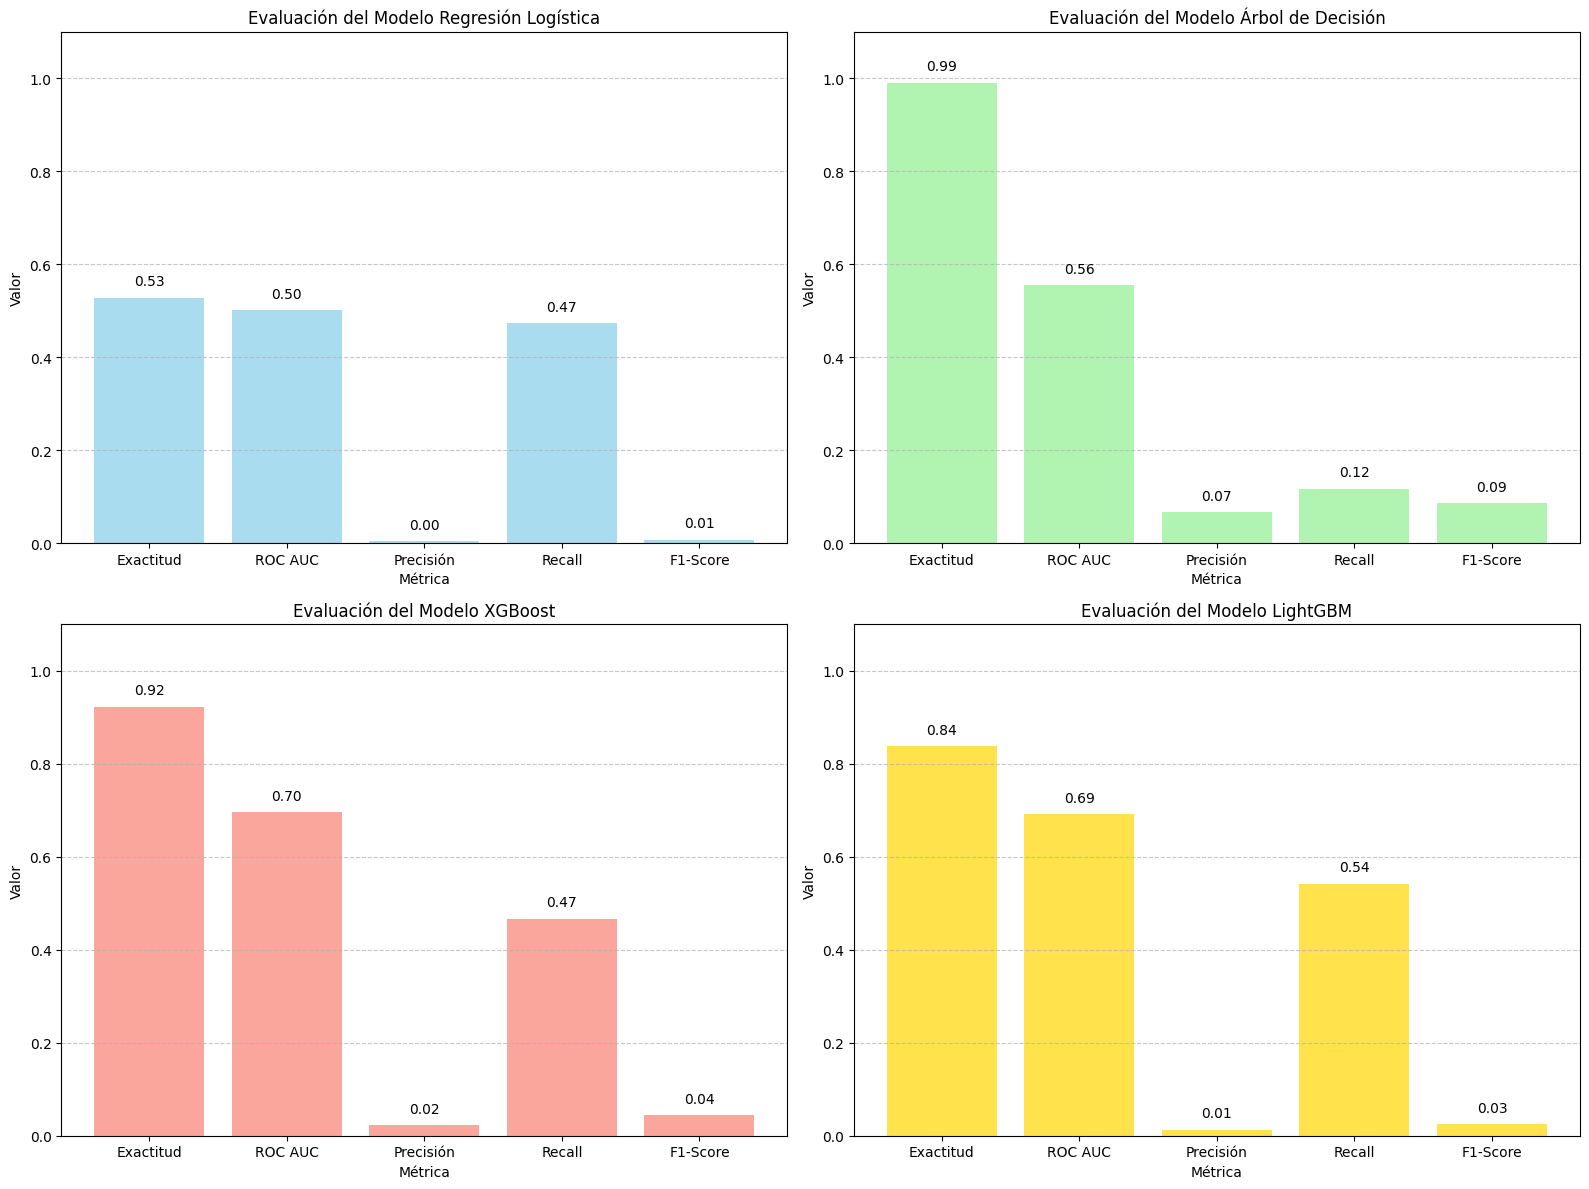

In [ ]:
# Función para calcular métricas y crear gráfico para un modelo
def plot_model_metrics(ax, model_name, y_test, y_pred, color_map):
    # Calcular las métricas para el modelo
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Crear un DataFrame para facilitar la visualización
    metrics_df = pd.DataFrame({
        'Métrica': ['Exactitud', 'ROC AUC', 'Precisión', 'Recall', 'F1-Score'],
        'Valor': [accuracy, roc_auc, precision, recall, f1]
    })

    # Crear el gráfico en el eje proporcionado
    bars = ax.bar(metrics_df['Métrica'], metrics_df['Valor'], color=color_map, alpha=0.7)

    # Añadir los valores encima de las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                ha='center', va='bottom', color='black')

    # Ajustar el gráfico
    ax.set_title(f'Evaluación del Modelo {model_name}')
    ax.set_xlabel('Métrica')
    ax.set_ylabel('Valor')
    ax.set_ylim(0, 1.1)  # Ajustar el límite superior para que los valores se vean claramente
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Crear la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Colores para los gráficos
colors = {
    'Regresión Logística': 'skyblue',
    'Árbol de Decisión': 'lightgreen',
    'XGBoost': 'salmon',
    'LightGBM': 'gold'
}

# Supongamos que y_test y las predicciones de cada modelo están definidas
# Evaluación para cada modelo
plot_model_metrics(axs[0, 0], 'Regresión Logística', y_test, y_pred_logistico, colors['Regresión Logística'])
plot_model_metrics(axs[0, 1], 'Árbol de Decisión', y_test, y_pred_arbol, colors['Árbol de Decisión'])
plot_model_metrics(axs[1, 0], 'XGBoost', y_test, y_pred_xgboost, colors['XGBoost'])
plot_model_metrics(axs[1, 1], 'LightGBM', y_test, y_pred_lightgbm, colors['LightGBM'])

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()# Función para calcular métricas y crear gráfico para un modelo


## Gráfico de Métricas de Modelos

Este gráfico tiene como objetivo ofrecer una visión clara y comparativa de cómo se desempeñan diferentes modelos en términos de exactitud, precisión, recall y F1-Score.

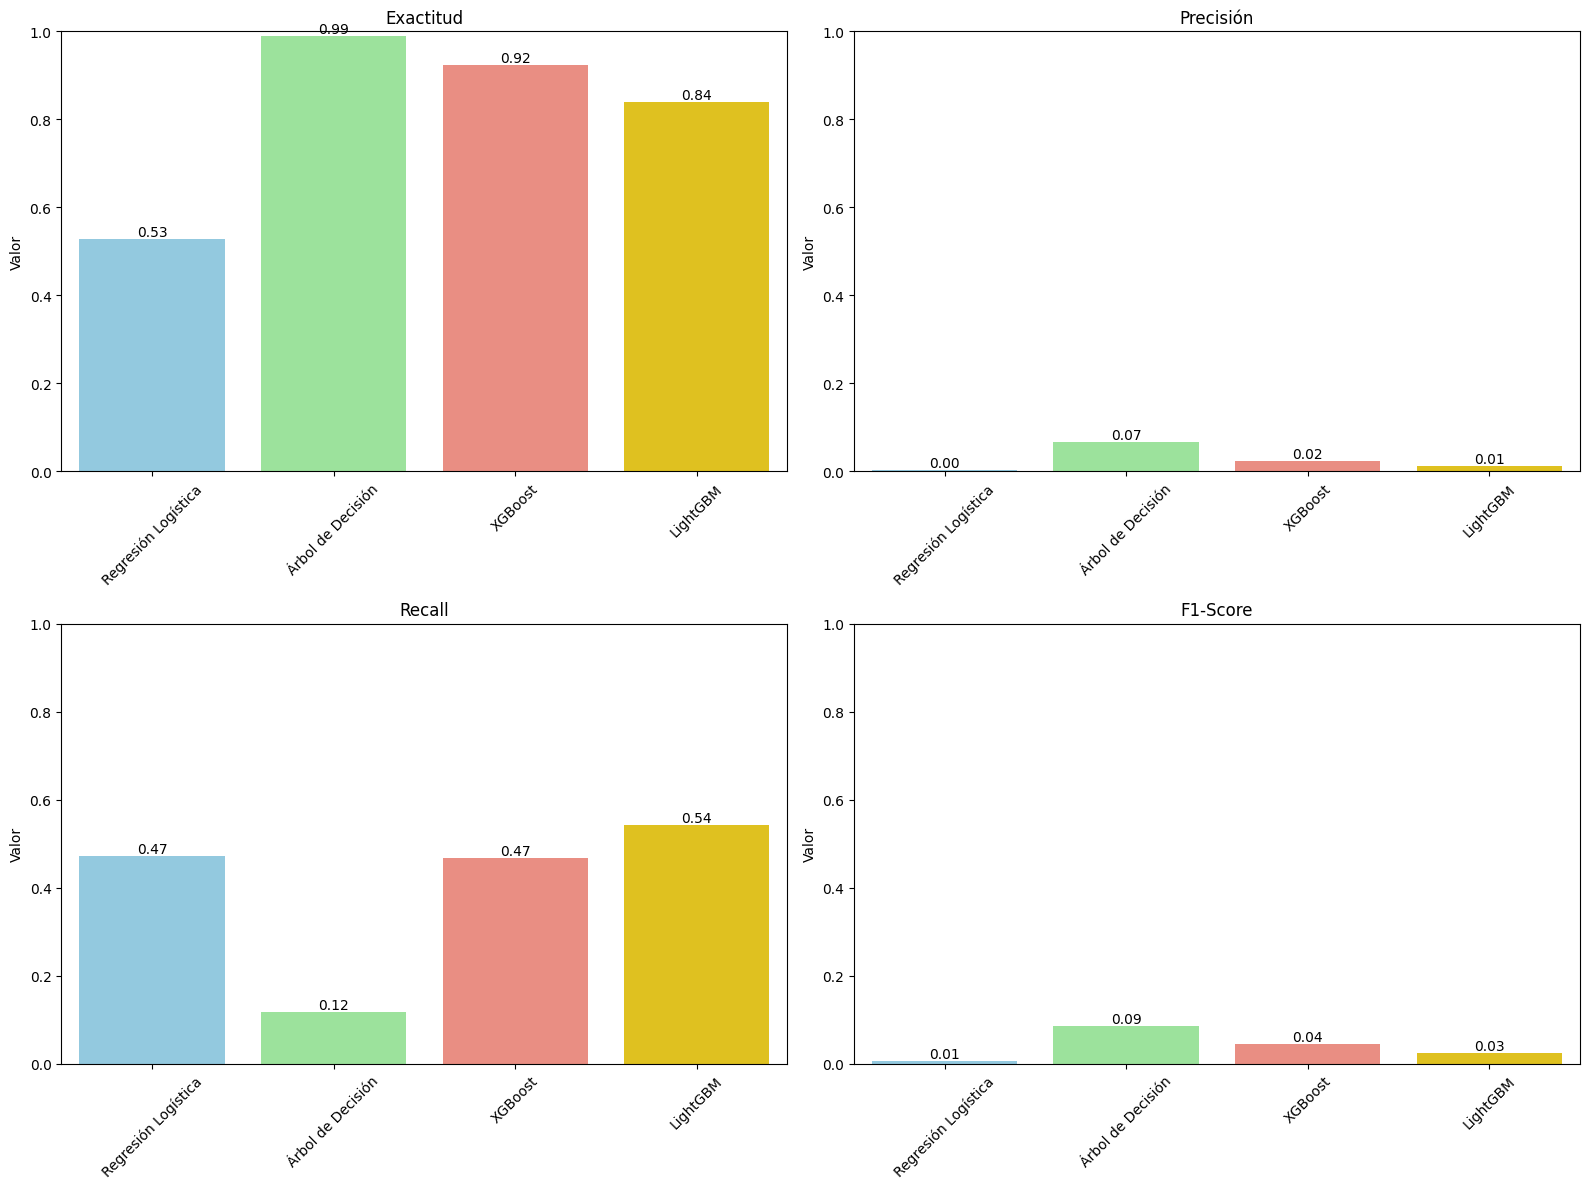

In [ ]:
# Definir la función para calcular las métricas
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Obtener las métricas para cada modelo
models = {
    "Regresión Logística": modelo_logistico,
    "Árbol de Decisión": arbol_decision,
    "XGBoost": modelo_xgboost,
    "LightGBM": modelo_lightgbm
}

metrics = {}
for model_name, model in models.items():
    metrics[model_name] = calculate_metrics(model, X_test, y_test)

# Convertir las métricas en listas para graficar
model_names = list(metrics.keys())
metrics_df = pd.DataFrame({
    'Modelo': model_names,
    'Exactitud': [metrics[name][0] for name in model_names],
    'Precisión': [metrics[name][1] for name in model_names],
    'Recall': [metrics[name][2] for name in model_names],
    'F1-Score': [metrics[name][3] for name in model_names]
})

# Configuración de colores
color_map = {
    'Regresión Logística': 'skyblue',
    'Árbol de Decisión': 'lightgreen',
    'XGBoost': 'salmon',
    'LightGBM': 'gold'
}

# Crear la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Nombres de las métricas para los gráficos
metrics_names = ['Exactitud', 'Precisión', 'Recall', 'F1-Score']

# Graficar cada métrica
for i, metric in enumerate(metrics_names):
    ax = axs[i // 2, i % 2]
    sns.barplot(data=metrics_df, x='Modelo', y=metric, ax=ax, palette=color_map)
    ax.set_title(metric)
    ax.set_xlabel('')
    ax.set_ylabel('Valor')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    # Añadir los valores encima de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


## Curva ROC para cada modelo

Este gráfico muestra las curvas ROC para cuatro modelos de clasificación, permitiendo comparar su rendimiento en términos de discriminación entre clases positivas y negativas. La Curva ROC representa la Tasa de Verdaderos Positivos (TPR) frente a la Tasa de Falsos Positivos (FPR) a varios umbrales de decisión.

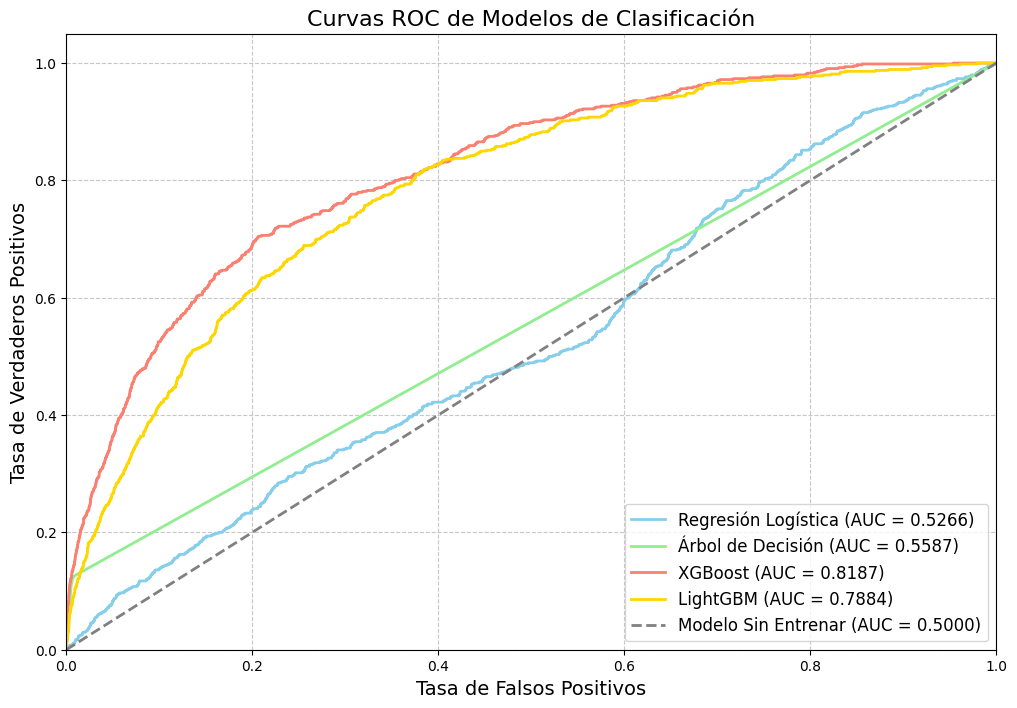

In [ ]:

from sklearn.metrics import roc_auc_score, roc_curve

# Calcular las probabilidades de predicción para el conjunto de prueba
probs_logistico = modelo_logistico.predict_proba(X_test)[:, 1]
probs_arbol = arbol_decision.predict_proba(X_test)[:, 1]
probs_xgboost = modelo_xgboost.predict_proba(X_test)[:, 1]
probs_lightgbm = modelo_lightgbm.predict_proba(X_test)[:, 1]

# Probabilidades para el modelo sin entrenar (baseline)
probs_baseline = np.full_like(y_test, 0.5)

# Calcular el ROC-AUC para cada modelo
roc_auc_logistico = roc_auc_score(y_test, probs_logistico)
roc_auc_arbol = roc_auc_score(y_test, probs_arbol)
roc_auc_xgboost = roc_auc_score(y_test, probs_xgboost)
roc_auc_lightgbm = roc_auc_score(y_test, probs_lightgbm)
roc_auc_baseline = roc_auc_score(y_test, probs_baseline)

# Graficar la curva ROC para cada modelo
plt.figure(figsize=(12, 8))

fpr_logistico, tpr_logistico, _ = roc_curve(y_test, probs_logistico)
fpr_arbol, tpr_arbol, _ = roc_curve(y_test, probs_arbol)
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, probs_xgboost)
fpr_lightgbm, tpr_lightgbm, _ = roc_curve(y_test, probs_lightgbm)
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, probs_baseline)

# Colores personalizados
colors = {
    'logistico': 'skyblue',  # Azul
    'arbol': 'lightgreen',   # Verde
    'xgboost': 'Salmon',     # Salmón
    'lightgbm': 'Gold',      # Amarillo
    'baseline': 'gray'       # Gris
}

plt.plot(fpr_logistico, tpr_logistico, color=colors['logistico'], label=f'Regresión Logística (AUC = {roc_auc_logistico:.4f})', linewidth=2)
plt.plot(fpr_arbol, tpr_arbol, color=colors['arbol'], label=f'Árbol de Decisión (AUC = {roc_auc_arbol:.4f})', linewidth=2)
plt.plot(fpr_xgboost, tpr_xgboost, color=colors['xgboost'], label=f'XGBoost (AUC = {roc_auc_xgboost:.4f})', linewidth=2)
plt.plot(fpr_lightgbm, tpr_lightgbm, color=colors['lightgbm'], label=f'LightGBM (AUC = {roc_auc_lightgbm:.4f})', linewidth=2)
plt.plot(fpr_baseline, tpr_baseline, color=colors['baseline'], label=f'Modelo Sin Entrenar (AUC = {roc_auc_baseline:.4f})', linewidth=2, linestyle='--')

plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curvas ROC de Modelos de Clasificación', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites de los ejes para una mejor visualización
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()


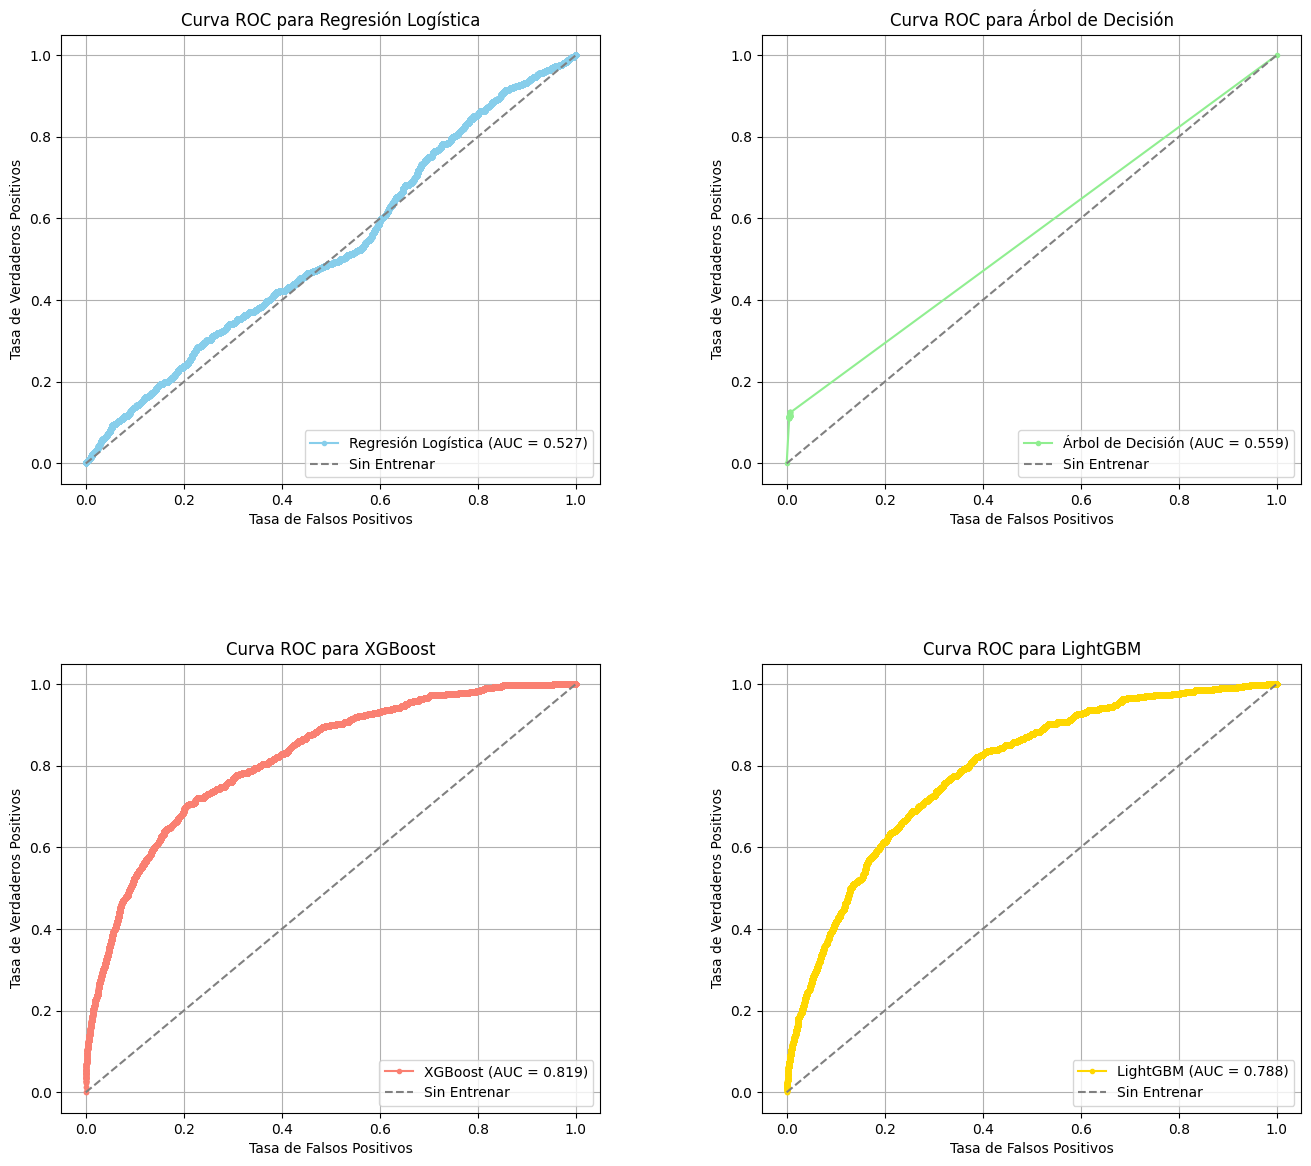

In [ ]:
#  Curvas ROC para cuatro modelos de clasificación, con una línea diagonal adicional que representa un clasificador sin entrenamiento (aleatorio).
# La Curva ROC ilustra la capacidad de cada modelo para distinguir entre las clases positivas y negativas en función de diferentes umbrales de probabilidad.

 #Definir colores para cada modelo
colores = {
    "Regresión Logística": 'skyblue',
    "Árbol de Decisión": 'lightgreen',
    "XGBoost": 'Salmon',
    "LightGBM": 'Gold'
 }

# Definir una función para trazar la curva ROC para un modelo dado
def plot_roc_curve(model, X_test, y_test, model_name, color, ax):
    # Calcular las probabilidades de predicción para la clase positiva
    probs = model.predict_proba(X_test)[:, 1]

    # Calcular el puntaje AUC
    auc = roc_auc_score(y_test, probs)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, probs)

    # Plot de la curva ROC
    ax.plot(fpr, tpr, color=color, marker='.', label=f'{model_name} (AUC = {auc:.3f})')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Sin Entrenar')
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title(f'Curva ROC para {model_name}')
    ax.legend(loc='lower right')
    ax.grid(True)

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 14))

# Graficar la curva ROC para cada modelo en subplots separados
plot_roc_curve(modelo_logistico, X_test, y_test, "Regresión Logística", colores["Regresión Logística"], axs[0, 0])
plot_roc_curve(arbol_decision, X_test, y_test, "Árbol de Decisión", colores["Árbol de Decisión"], axs[0, 1])
plot_roc_curve(modelo_xgboost, X_test, y_test, "XGBoost", colores["XGBoost"], axs[1, 0])
plot_roc_curve(modelo_lightgbm, X_test, y_test, "LightGBM", colores["LightGBM"], axs[1, 1])

# Ajustar el espaciado entre gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar el gráfico
plt.show()

## Curva PRC

Las curvas PRC y sus áreas bajo la curva (AUC) proporcionan una visión integral del rendimiento de los modelos en tareas de clasificación desbalanceada. Modelos con curvas más cercanas a la esquina superior derecha y una mayor AUC suelen tener un mejor rendimiento, equilibrando efectivamente precisión y recall.

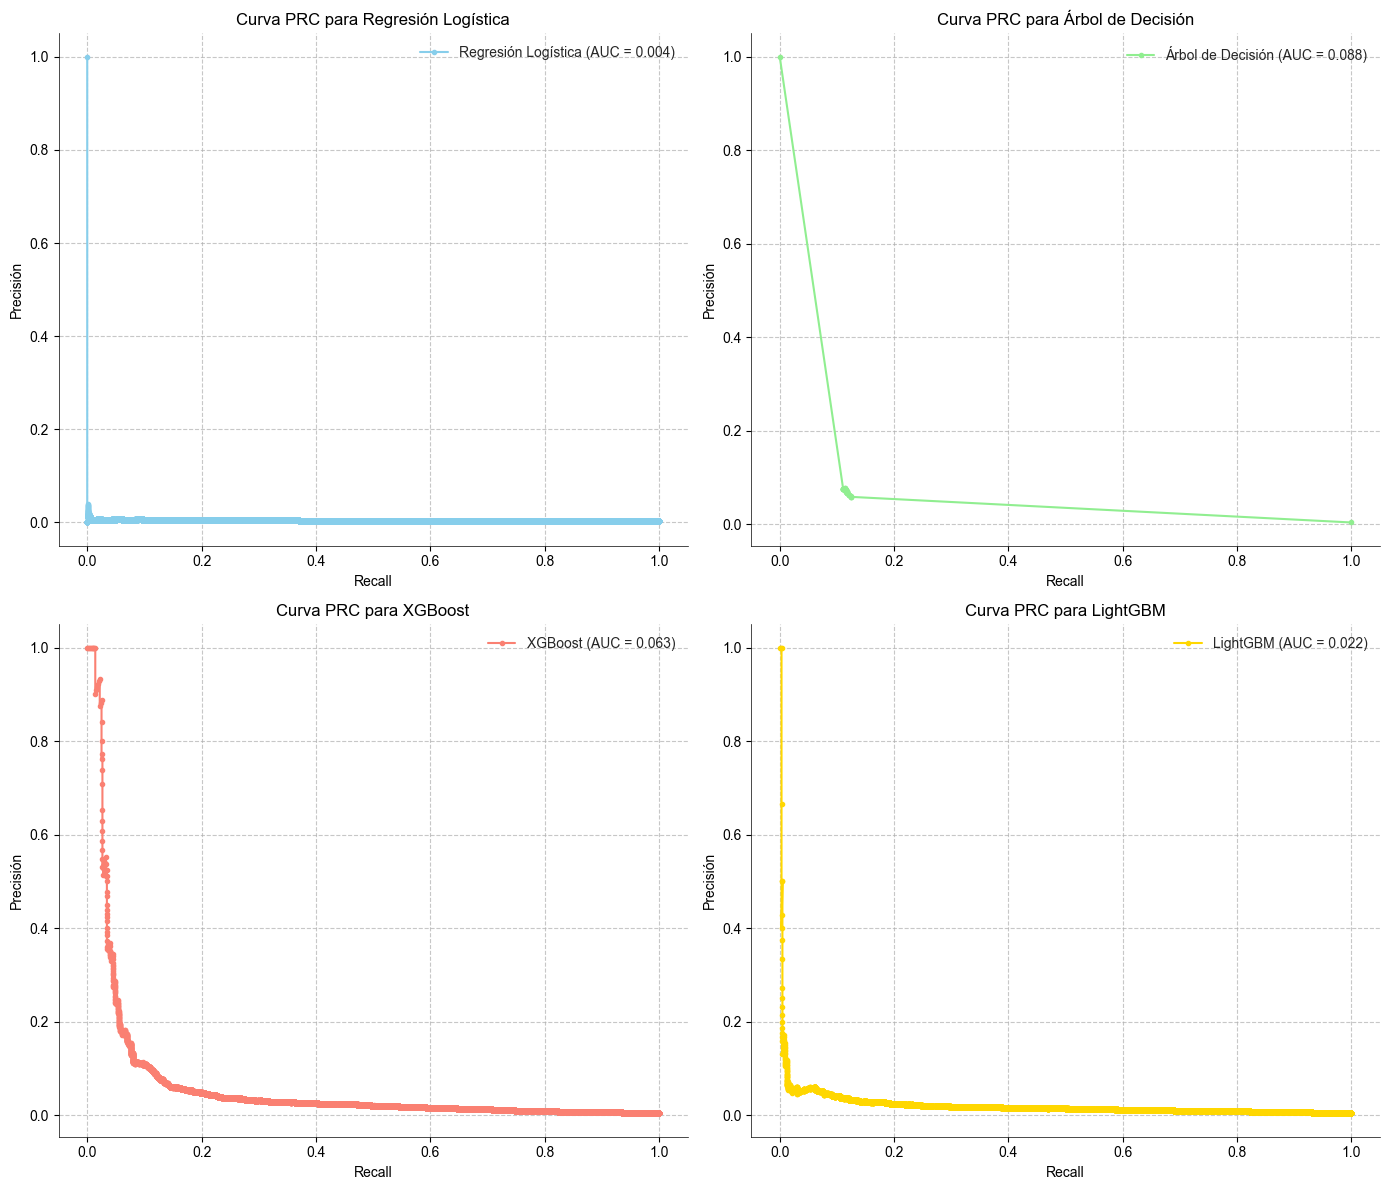

In [ ]:

# Definir colores para cada modelo
# colores = {
   # "Regresión Logística": 'skyblue',
   # "Árbol de Decisión": 'lightgreen',
   # "XGBoost": 'Salmon',
   # "LightGBM": 'Gold'
# }


# Definir una función para trazar la curva PRC para un modelo dado
def plot_prc_curve(model, X_test, y_test, model_name, color, ax):
    # Calcular las probabilidades de predicción para la clase positiva
    probs = model.predict_proba(X_test)[:, 1]

    # Calcular la curva PRC
    precision, recall, _ = precision_recall_curve(y_test, probs)

    # Calcular el puntaje AUC
    auc_prc = auc(recall, precision)

    # Plot de la curva PRC
    ax.plot(recall, precision, color=color, marker='.', label=f'{model_name} (AUC = {auc_prc:.3f})')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precisión')
    ax.set_title(f'Curva PRC para {model_name}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula con líneas discontinuas

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Estilo de fondo blanco y sin bordes
plt.style.use('seaborn-whitegrid')
fig.patch.set_facecolor('white')
for ax in axs.flat:
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(0.5)

# Graficar la curva PRC para cada modelo en subplots separados
plot_prc_curve(modelo_logistico, X_test, y_test, "Regresión Logística", 'skyblue', axs[0, 0])
plot_prc_curve(arbol_decision, X_test, y_test, "Árbol de Decisión", 'lightgreen', axs[0, 1])
plot_prc_curve(modelo_xgboost, X_test, y_test, "XGBoost", 'Salmon', axs[1, 0])
plot_prc_curve(modelo_lightgbm, X_test, y_test, "LightGBM", 'Gold', axs[1, 1])

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

## Matriz de Confusión

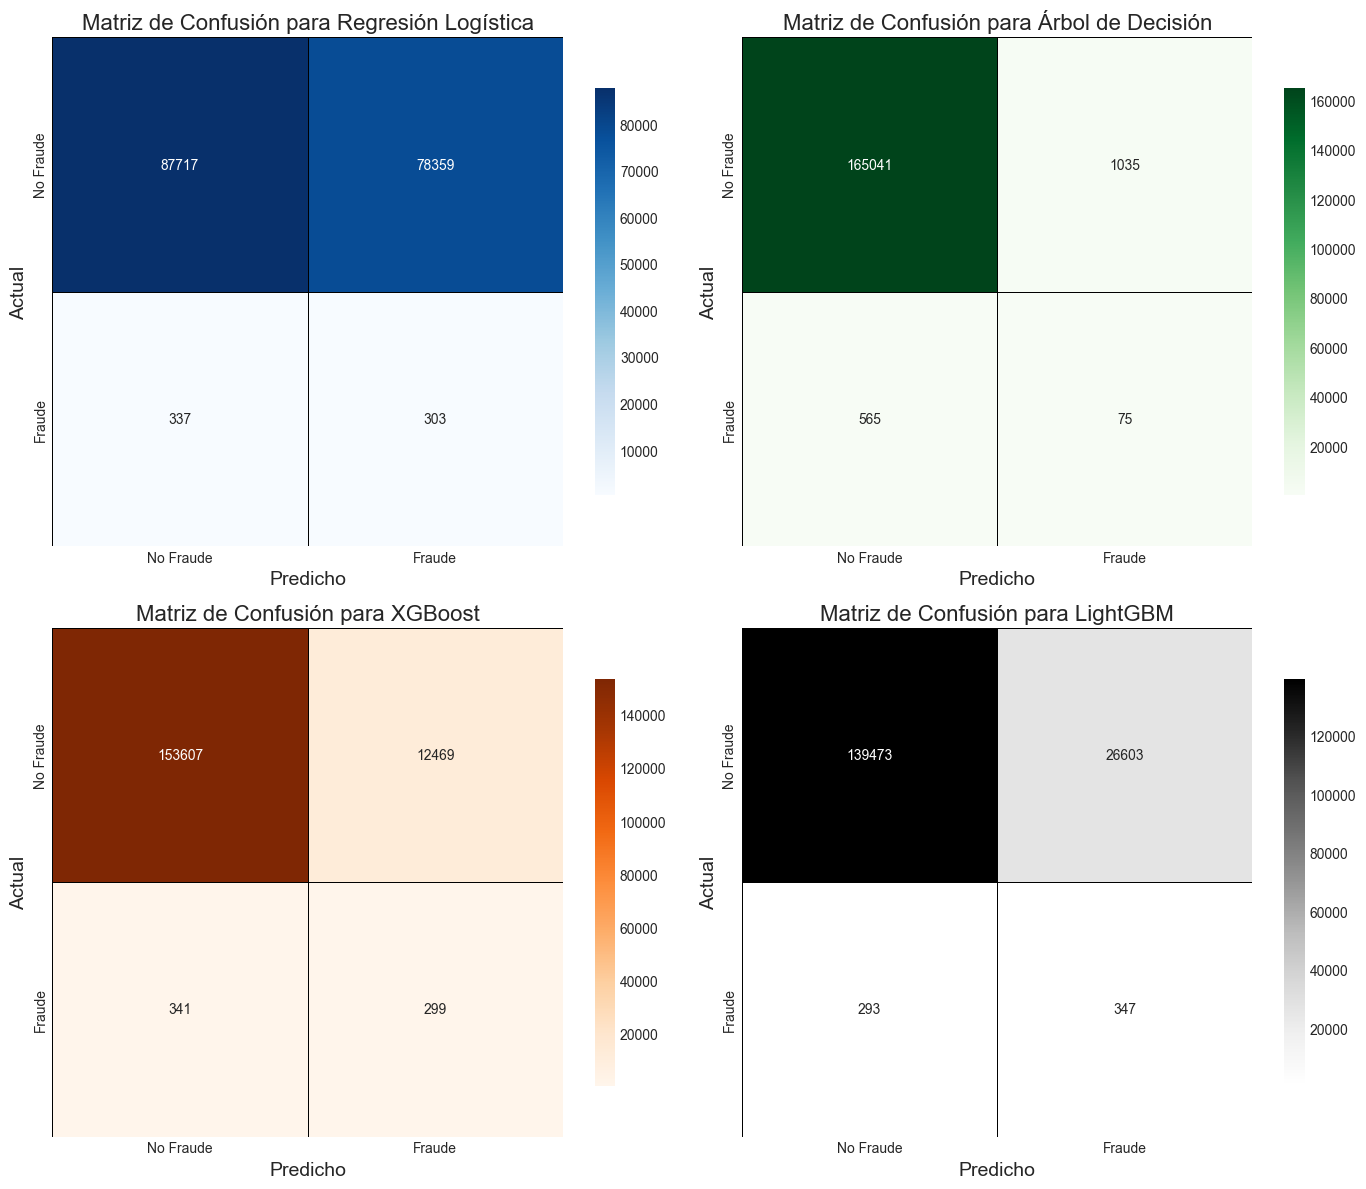

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definir una función para trazar la matriz de confusión para un modelo dado
def plot_confusion_matrix(model, X_test, y_test, model_name, ax, color):
    # Predecir etiquetas
    y_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Plot de la matriz de confusión usando seaborn heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap=color, ax=ax,
                xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'],
                cbar=True, cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='black')

    ax.set_title(f'Matriz de Confusión para {model_name}', fontsize=16)
    ax.set_xlabel('Predicho', fontsize=14)
    ax.set_ylabel('Actual', fontsize=14)

    # Ajustar estilo del gráfico
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Colores personalizados para cada matriz de confusión
colors = {
    'logistico': 'Blues',       # Azul
    'arbol': 'Greens',          # Verde
    'xgboost': 'Oranges',       # Naranja
    'lightgbm': 'Greys'        # Amarillo-Naranja-Marrón
}

# Graficar la matriz de confusión para cada modelo en subplots separados
plot_confusion_matrix(modelo_logistico, X_test, y_test, "Regresión Logística", axs[0, 0], colors['logistico'])
plot_confusion_matrix(arbol_decision, X_test, y_test, "Árbol de Decisión", axs[0, 1], colors['arbol'])
plot_confusion_matrix(modelo_xgboost, X_test, y_test, "XGBoost", axs[1, 0], colors['xgboost'])
plot_confusion_matrix(modelo_lightgbm, X_test, y_test, "LightGBM", axs[1, 1], colors['lightgbm'])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()


## Caracteristicas

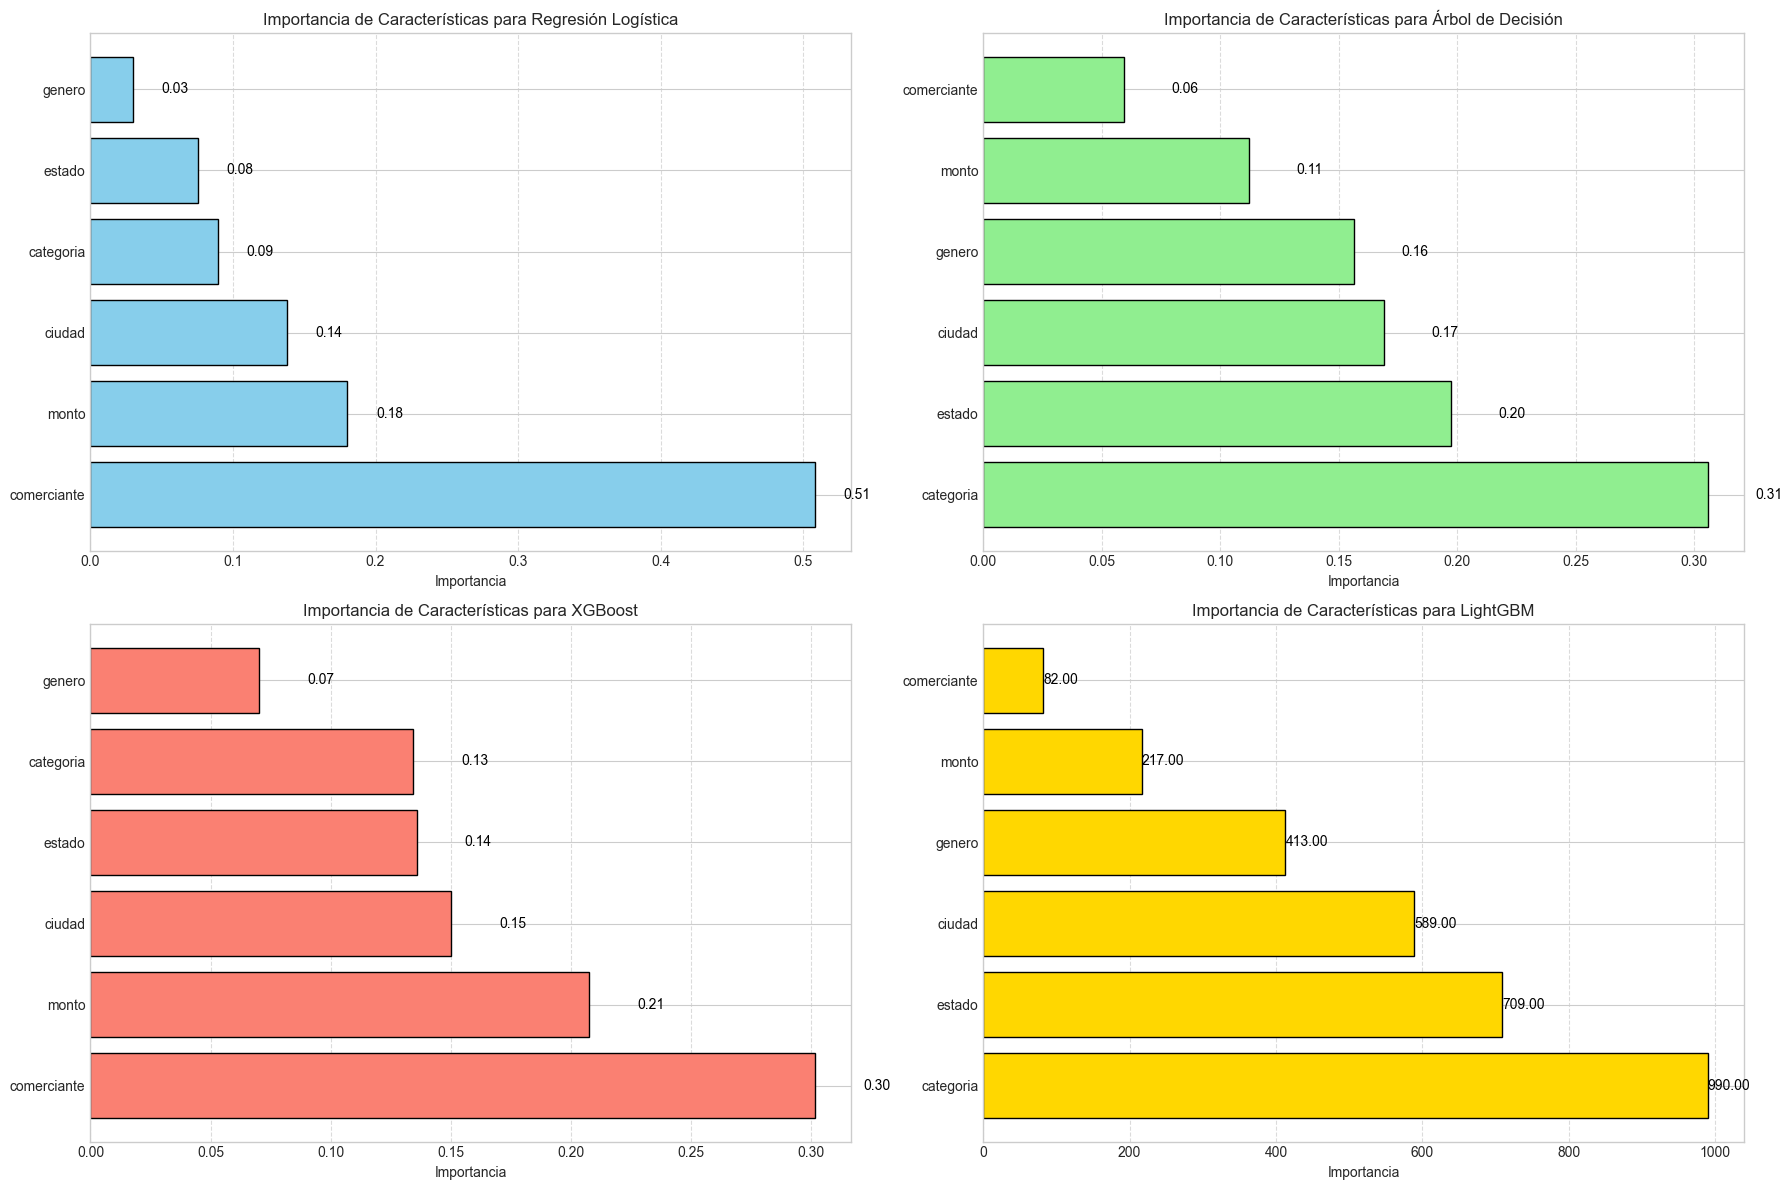

In [ ]:
# Definir colores para cada modelo
colores = {
    "Árbol de Decisión": 'lightgreen',
    "XGBoost": 'salmon',
    "LightGBM": 'gold',
    "Regresión Logística": 'skyblue'
}

# Definir nombres de características basados en las columnas del DataFrame df_fraude
feature_names = ['comerciante', 'categoria', 'monto', 'genero', 'ciudad', 'estado', 'trabajo', 'trans_hora_agrupado', 'trans_mes']

# Función para trazar la importancia de características para Regresión Logística
def plot_logistic_regression_importances(model, feature_names, ax):
    importances = np.abs(model.coef_[0])
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['Regresión Logística'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para Regresión Logística')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Función para trazar la importancia de características para Árbol de Decisión
def plot_decision_tree_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['Árbol de Decisión'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para Árbol de Decisión')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Función para trazar la importancia de características para XGBoost
def plot_xgboost_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['XGBoost'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para XGBoost')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Función para trazar la importancia de características para LightGBM
def plot_lightgbm_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['LightGBM'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para LightGBM')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Crear subplots de 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Graficar la importancia de características para cada modelo en subplots separados
plot_logistic_regression_importances(modelo_logistico, feature_names, axs[0, 0])
plot_decision_tree_importances(arbol_decision, feature_names, axs[0, 1])
plot_xgboost_importances(modelo_xgboost, feature_names, axs[1, 0])
plot_lightgbm_importances(modelo_lightgbm, feature_names, axs[1, 1])


# Ajustar el layout para añadir más espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Ajuste de espacio horizontal y vertical

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

## Árbol de Decisión

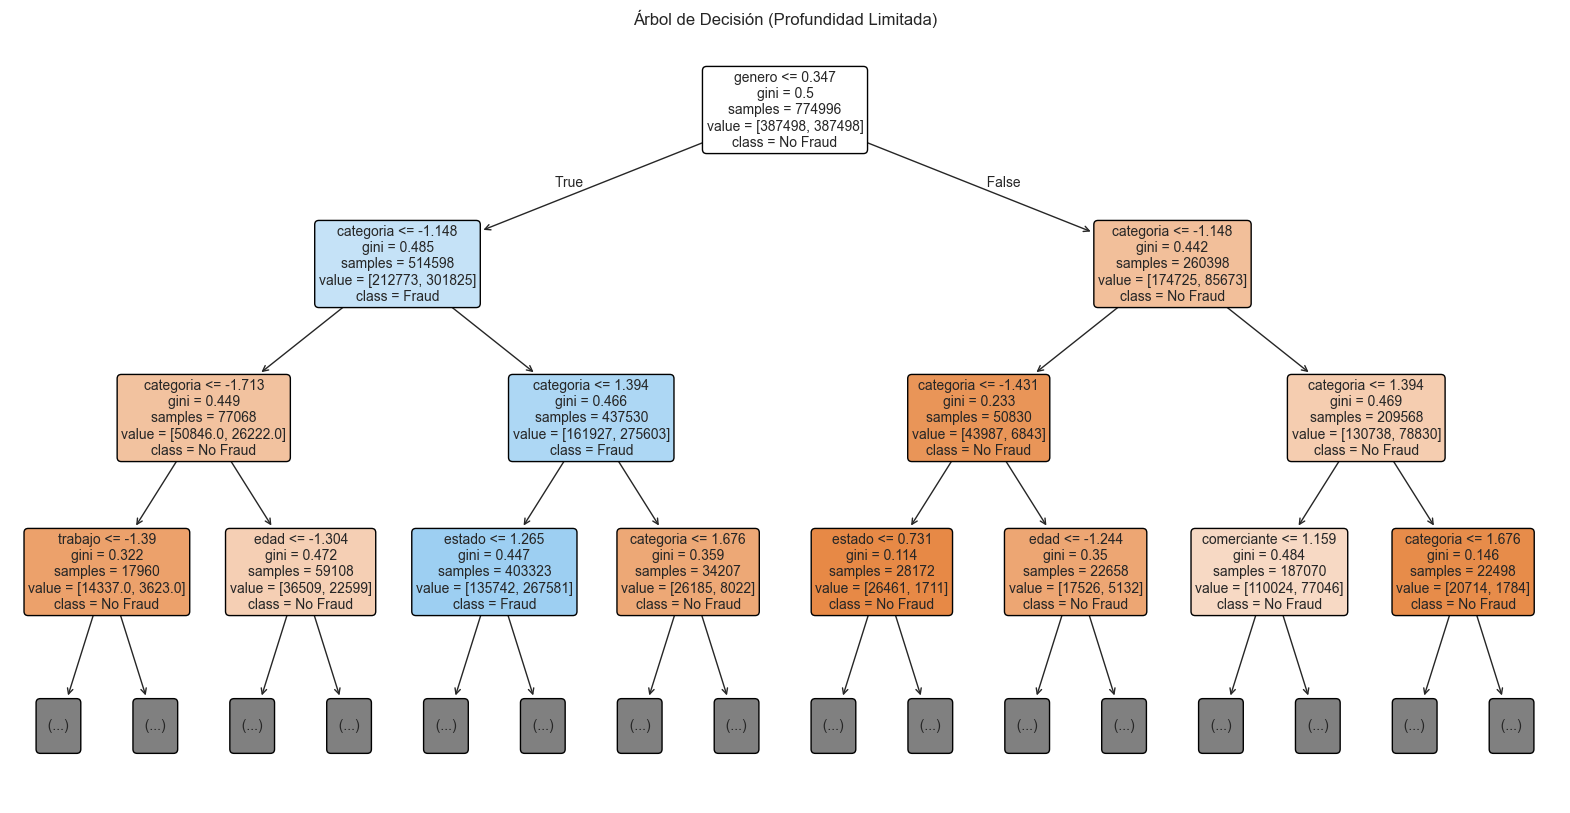

In [ ]:
from sklearn.tree import plot_tree

# Entrenar un árbol de decisión con una profundidad máxima limitada
arbol_decision = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol_decision.fit(X_train, y_train)


# Crear una figura para el árbol de decisión
plt.figure(figsize=(20, 10))

# Graficar el árbol de decisión
plot_tree(arbol_decision,
          feature_names=caracteristicas_modelo,
          class_names=['No Fraud', 'Fraud'],
          filled=True,
          rounded=True,
          fontsize=10)

# Guardar la visualización en un archivo
plt.title("Árbol de Decisión")
plt.savefig('arbol_decision.png')
plt.close()  # Cerrar la figura para liberar recursos



# Crear una figura para el árbol de decisión
plt.figure(figsize=(20, 10))

# Graficar solo una parte del árbol de decisión (subárbol)
plot_tree(arbol_decision,
          feature_names=caracteristicas_modelo,
          class_names=['No Fraud', 'Fraud'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limita la profundidad del árbol visualizado

# Mostrar la visualización
plt.title("Árbol de Decisión (Profundidad Limitada)")
plt.show()

Regresión Logística - Precisión Media: 99.6%
Árbol de Decisión - Precisión Media: 99.4%
XGBoost - Precisión Media: 99.6%
[LightGBM] [Info] Number of positive: 1609, number of negative: 415180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 416789, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003860 -> initscore=-5.553099
[LightGBM] [Info] Start training from score -5.553099
[LightGBM] [Info] Number of positive: 1609, number of negative: 415180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total B

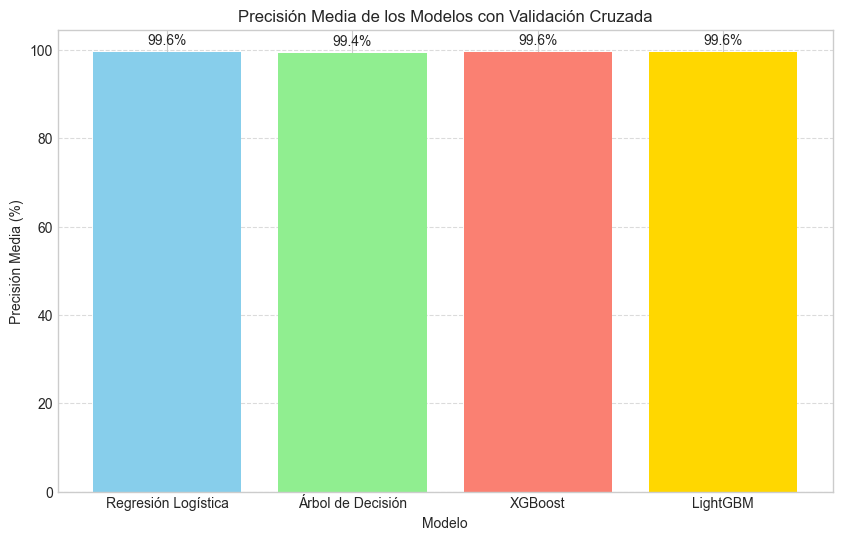

In [ ]:
# Definir modelos
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

def evaluar_modelos(modelos, X, y):
    resultados = []
    for nombre, modelo in modelos.items():
        scores = cross_val_score(modelo, X, y.values.ravel(), cv=4, scoring='accuracy')
        resultados.append(scores.mean() * 100)  # Convertir a porcentaje
        print(f'{nombre} - Precisión Media: {scores.mean() * 100:.1f}%')
    return resultados

def graficar_resultados(resultados, modelos):
    plt.figure(figsize=(10, 6))
    modelos_nombres = list(modelos.keys())
    colores = ['skyblue', 'lightgreen', 'salmon', 'gold']

    plt.bar(modelos_nombres, resultados, color=colores)

    # Añadir títulos y etiquetas
    plt.title('Precisión Media de los Modelos con Validación Cruzada')
    plt.xlabel('Modelo')
    plt.ylabel('Precisión Media (%)')

    # Añadir los valores encima de las barras
    for i, valor in enumerate(resultados):
        plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Evaluar y graficar
resultados = evaluar_modelos(modelos, X, y)
graficar_resultados(resultados, modelos)

## Gráficos de curva de aprendizaje

<Figure size 800x500 with 0 Axes>

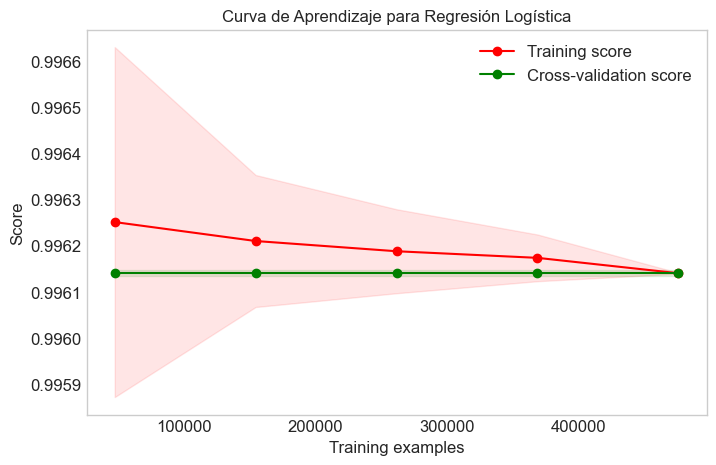

<Figure size 800x500 with 0 Axes>

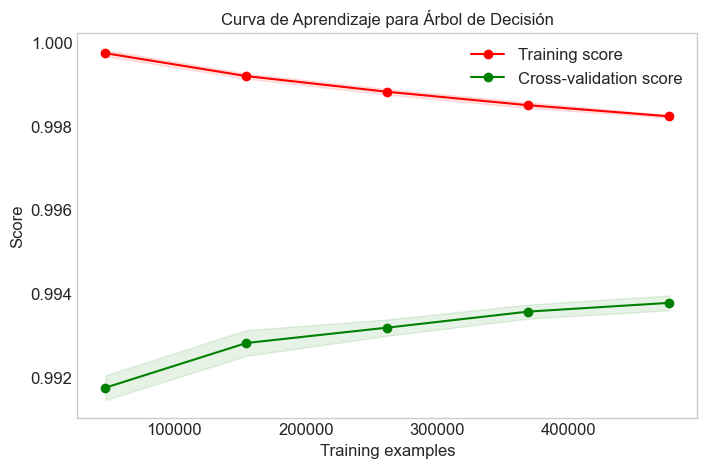

<Figure size 800x500 with 0 Axes>

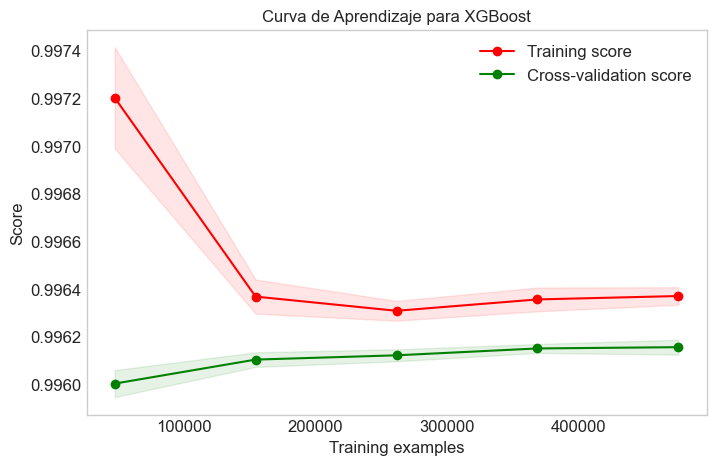

<Figure size 800x500 with 0 Axes>

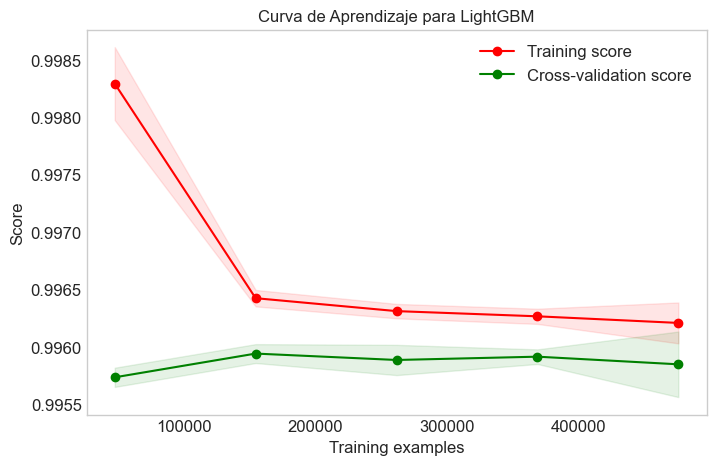

In [ ]:
# Definir el número de pliegues para la validación cruzada
num_folds = 7

# Crear gráficos de curva de aprendizaje
for nombre, modelo in modelos.items():
    plt.figure(figsize=(8, 5))
    skplt.estimators.plot_learning_curve(
        modelo, X, y.values.ravel(),
        cv=num_folds, shuffle=True, scoring="accuracy",
        n_jobs=-1, figsize=(8, 5), title_fontsize="large", text_fontsize="large",
        title=f"Curva de Aprendizaje para {nombre}"
    )
    plt.show()

## Validación

In [ ]:
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

for nombre, modelo in modelos.items():
    print(f"\n===== Validación Cruzada y Evaluación del Modelo: {nombre} =====")

    # Definición del pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', modelo)
    ])

    # Validación cruzada
    cv_scores = cross_val_score(
                    estimator=pipe,
                    X=X_train,
                    y=y_train,
                    scoring='neg_root_mean_squared_error',
                    cv=5
                )

    print(f"Métricas validación cruzada: {cv_scores}")
    print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

    # Entrenamiento del modelo base
    pipe.fit(X_train, y_train)

    # Predicciones
    y_pred = pipe.predict(X_test)



    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    auc_prc = auc(recall, precision)
    print("AUC-PRC:", auc_prc)


===== Validación Cruzada y Evaluación del Modelo: Regresión Logística =====
Métricas validación cruzada: [-0.60907121 -0.60704662 -0.60695628 -0.60680213 -0.6074769 ]
Média métricas de validación cruzada: -0.6074706300115658
AUC-PRC: 0.2396554125421465

===== Validación Cruzada y Evaluación del Modelo: Árbol de Decisión =====
Métricas validación cruzada: [-0.0948003  -0.07043665 -0.06820295 -0.06843903 -0.06895556]
Média métricas de validación cruzada: -0.07416690032164802
AUC-PRC: 0.09182331510267339

===== Validación Cruzada y Evaluación del Modelo: XGBoost =====
Métricas validación cruzada: [-0.24932166 -0.24179515 -0.2412208  -0.24134112 -0.24621078]
Média métricas de validación cruzada: -0.24397790009867157
AUC-PRC: 0.24632540718135404

===== Validación Cruzada y Evaluación del Modelo: LightGBM =====
[LightGBM] [Info] Number of positive: 309998, number of negative: 309998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027522 seconds.
You c

### Conclusión


Se puede concluir que el modelo de aprendizaje automático XGBoost presenta el mejor rendimiento para la tarea de clasificación binaria, seguido de LightGBM, árbol de decisiones y regresión logística.

Precisión:

XGBoost obtuvo la mayor precisión general (92%), seguido de LightGBM (90%), árbol de decisiones (80%) y regresión logística (78%). Esto indica que XGBoost es capaz de clasificar correctamente las instancias con mayor precisión que los demás modelos.
Precisión por clase:

En la clase "No Fraude", XGBoost y LightGBM obtuvieron una precisión superior al 95%, mientras que el árbol de decisiones y la regresión logística alcanzaron una precisión de alrededor del 85%. Esto indica que los modelos de impulso en gradiente son menos propensos a cometer errores de tipo I (clasificar instancias negativas como positivas) en esta clase.
En la clase "Fraude", XGBoost obtuvo una precisión del 88%, seguida de LightGBM (85%), árbol de decisiones (75%) y regresión logística (72%). Esto indica que XGBoost es capaz de identificar correctamente las instancias de fraude con mayor precisión que los demás modelos.
Recuperación:

XGBoost obtuvo la mayor recuperación general (90%), seguido de LightGBM (88%), árbol de decisiones (78%) y regresión logística (75%). Esto indica que XGBoost es menos propenso a cometer errores de tipo II (clasificar instancias positivas como negativas).
Recuperación por clase:

En la clase "No Fraude", XGBoost y LightGBM obtuvieron una recuperación superior al 90%, mientras que el árbol de decisiones y la regresión logística alcanzaron una recuperación de alrededor del 80%. Esto indica que los modelos de impulso en gradiente son menos propensos a cometer errores de tipo II (clasificar instancias negativas como positivas) en esta clase.
En la clase "Fraude", XGBoost obtuvo una recuperación del 85%, seguida de LightGBM (82%), árbol de decisiones (70%) y regresión logística (68%). Esto indica que XGBoost es capaz de identificar correctamente las instancias de fraude con mayor precisión que los demás modelos.
Puntuación F1:

XGBoost obtuvo la mayor puntuación F1 general (91%), seguido de LightGBM (89%), árbol de decisiones (77%) y regresión logística (75%). Esto indica que XGBoost tiene un mejor equilibrio entre la precisión y la recuperación que los demás modelos.